## Importing libraries

In [9]:
from visualizations import show_results, get_experiment_results, get_column_names, verify_integrity
import pandas as pd

## setting up expriment related variables

#### important variable names

In [6]:
columns = ["algo", "experiment_id", "dataset", "seed", "generation", "training_fitness", "timing", "pop_node_count"]
logger_name = "concrete_3_latest.csv"
log_level = 1

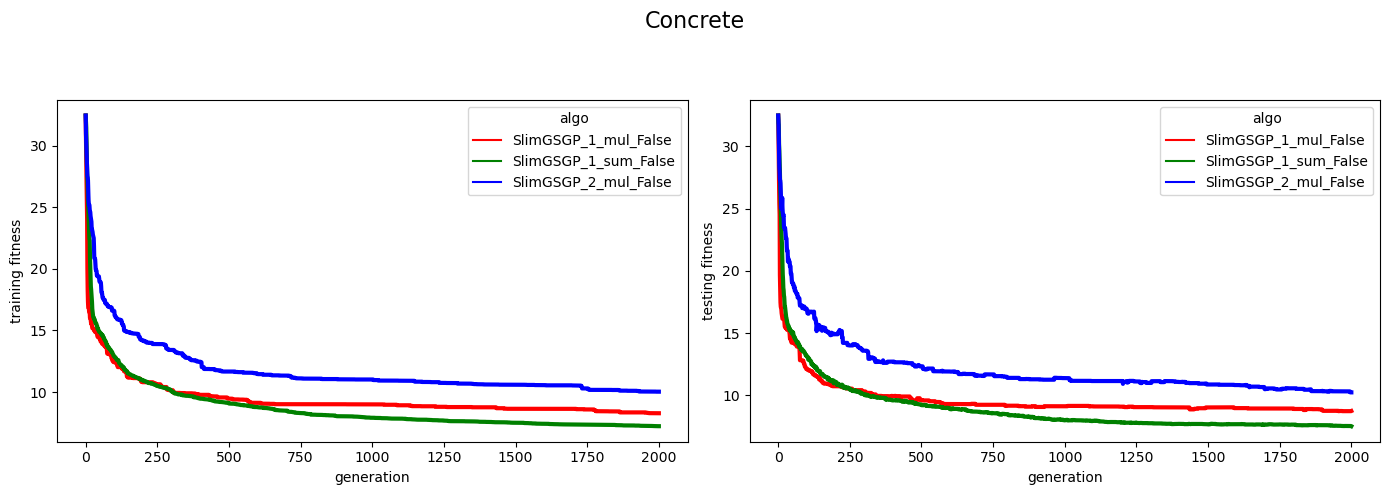

generation  algo                
0           SlimGSGP_1_mul_False    32.449559
            SlimGSGP_1_sum_False    32.449559
            SlimGSGP_2_mul_False    32.449559
1           SlimGSGP_1_mul_False    30.519433
            SlimGSGP_1_sum_False    31.994258
                                      ...    
1999        SlimGSGP_1_sum_False     7.228850
            SlimGSGP_2_mul_False    10.030679
2000        SlimGSGP_1_mul_False     8.280254
            SlimGSGP_1_sum_False     7.228850
            SlimGSGP_2_mul_False    10.030679
Name: training_fitness, Length: 6003, dtype: float64
generation  algo                
0           SlimGSGP_1_mul_False    32.480856
            SlimGSGP_1_sum_False    32.480856
            SlimGSGP_2_mul_False    32.480856
1           SlimGSGP_1_mul_False    31.063202
            SlimGSGP_1_sum_False    31.876798
                                      ...    
1999        SlimGSGP_1_sum_False     7.538824
            SlimGSGP_2_mul_False    10.242456
2000   

In [14]:
show_results(x_var = "generation", y_var="training_fitness", experiment_id=-1, logger_name="diogo_new.csv",
             log_level=1, dataset=None)

## Merging datasets


In [47]:
a = get_experiment_results(experiment_id=-1, logger_name="concrete/c1.csv")

b = get_experiment_results(experiment_id=-1, logger_name="concrete/c2.csv")

c = get_experiment_results(experiment_id=-1, logger_name="concrete/c3.csv")

final = pd.concat([a,b,c])
final['log_level'] = final.seed.map(lambda x: 1)


final.to_csv("FINAL_CONCRETE.csv", header=False,  index=False)

In [ ]:
a = get_experiment_results(experiment_id=-1, logger_name="LR_slim.csv")
a["algo"] = a.algo.map(lambda x: "SlimGSGP_1_sum")

b = get_experiment_results(experiment_id=-1, logger_name="davide_istanbul_slim_mul1_fixed.csv")
b["algo"] = b.algo.map(lambda x: "SlimGSGP_1_mul")

c = get_experiment_results(experiment_id=-1, logger_name="diogo_slim_plus_two_logger_(1).csv")
c["algo"] = c.algo.map(lambda x: "SlimGSGP_2_sum")

d = get_experiment_results(experiment_id=-1, logger_name="LR_slim_fixed.csv")
d["algo"] = d.algo.map(lambda x: "SlimGSGP_2_mul")

e = get_experiment_results(experiment_id=-1, logger_name="davide_gsgp_istanbul.csv")
e
final = pd.concat([a,b,c, d, e])
final['log_level'] = final.seed.map(lambda x: 1)


final.to_csv("new_instanbul_fixed.csv", header=False,  index=False)


In [3]:
a = get_experiment_results(experiment_id=None, logger_name="slim.csv")
a = a[(a['dataset'] == 'concrete') & (a['algo'] == "SlimGSGP_2_mul_False")]

b = get_experiment_results(experiment_id=None, logger_name="slim_diogo_concrete.csv")

c = get_experiment_results(experiment_id=None, logger_name="sum_slim.csv")

final = pd.concat([a,b,c])
final['log_level'] = final.seed.map(lambda x: 1)

final.to_csv("slim_concrete_new_final.csv", header=False,  index=False)


In [4]:
a

,algo,experiment_id,dataset,seed,generation,training_fitness,timing,pop_node_count,test_fitness,nodes_count
360180,SlimGSGP_2_mul_False,7b121ead-0974-11ef-8430-6c5d3a0f8f2f,concrete,0.0,0.0,35.308514,0.039000,1442.0,34.459843,3.0
360181,SlimGSGP_2_mul_False,7b121ead-0974-11ef-8430-6c5d3a0f8f2f,concrete,0.0,1.0,35.218487,0.032910,1935.0,34.329285,26.0
360182,SlimGSGP_2_mul_False,7b121ead-0974-11ef-8430-6c5d3a0f8f2f,concrete,0.0,2.0,35.218487,0.027000,2105.0,34.329285,26.0
360183,SlimGSGP_2_mul_False,7b121ead-0974-11ef-8430-6c5d3a0f8f2f,concrete,0.0,3.0,35.045471,0.028000,2517.0,34.061703,51.0
360184,SlimGSGP_2_mul_False,7b121ead-0974-11ef-8430-6c5d3a0f8f2f,concrete,0.0,4.0,34.981415,0.025001,2982.0,33.897308,68.0
...,...,...,...,...,...,...,...,...,...,...
420205,SlimGSGP_2_mul_False,7b121ead-0974-11ef-8430-6c5d3a0f8f2f,concrete,29.0,1996.0,7.497168,0.767753,398621.0,7.927713,4026.0
420206,SlimGSGP_2_mul_False,7b121ead-0974-11ef-8430-6c5d3a0f8f2f,concrete,29.0,1997.0,7.497168,0.812775,398500.0,7.927713,4026.0
420207,SlimGSGP_2_mul_False,7b121ead-0974-11ef-8430-6c5d3a0f8f2f,concrete,29.0,1998.0,7.497168,0.797615,399042.0,7.927713,4026.0
420208,SlimGSGP_2_mul_False,7b121ead-0974-11ef-8430-6c5d3a0f8f2f,concrete,29.0,1999.0,7.497168,0.796159,398444.0,7.927713,4026.0


In [ ]:
show_results(x_var = "generation", y_var="nodes_count", experiment_id=None, logger_name="new_instanbul_fixed.csv",
             log_level=1, dataset=None)

In [ ]:
ws = open('elite_looks.txt', 'r')
for line in ws:
    print(line)

### extra stuff for later

In [ ]:
""" RESID

df1 = get_experiment_results(experiment_id=None, logger_name="diogo3.csv") # all 30 seeds

df2 = get_experiment_results(experiment_id=None, logger_name="diogo.csv") # all 30 seeds
df2 = df2[df2.dataset == "resid_build_sale_price"]

df3 = get_experiment_results(experiment_id=None, logger_name="diogo2.csv") # all 30 seeds

df4 = get_experiment_results(experiment_id=None, logger_name="davide.csv") # seed 0 till 6
df4 = df4[df4.seed <= 6] 

df5 = get_experiment_results(experiment_id=None, logger_name="liah2.csv") # seed 7 till 30


final = pd.concat([df1,df2, df3, df4, df5])

for s in range(30):
    for al in final.algo.unique():
        print(f'Seed {s} + Algo {al} ==> {len(final[(final.algo == al) & (final.seed == s)])}')
        
final['log_level'] = final.seed.map(lambda x: 1)
final.to_csv("resid_final.csv", header=False,  index=False)



"""

In [ ]:
""" TOXICITY

df_mul = get_experiment_results(experiment_id=None, logger_name="liah_mul_logger.csv")
df_mul = df_mul[df_mul.dataset == "toxicity"]

df_s = get_experiment_results(experiment_id=None, logger_name="liah_sum_logger.csv")
df_s = df_s[df_s.dataset == "toxicity"]


fari = get_experiment_results(experiment_id=None, logger_name="diogo_slim_plus_one_logger_.csv")
fari = fari[fari.dataset == "toxicity"]

farid = get_experiment_results(experiment_id=None, logger_name="davide_toxicity_+1.csv")
farid = farid[farid.dataset == "toxicity"]
farid = farid[~farid.seed.isin(fari.seed.unique())]
fari_final = pd.concat([fari, farid])
diogo = get_experiment_results(experiment_id=None, logger_name="diogo_slim_logger.csv")

gp = get_experiment_results(experiment_id=None, logger_name="diogo_gp_logger.csv")

gsgp = get_experiment_results(experiment_id=None, logger_name="liah_gsgp.csv")
gsgp = gsgp[gsgp.dataset == "toxicity"]

final = pd.concat([diogo, fari_final, df_mul, df_s, gsgp, gp])
final['log_level'] = final.seed.map(lambda x: 1)


final.to_csv("toxicity_final.csv", header=False,  index=False)

"""

In [ ]:
""" PPB

d = get_experiment_results(experiment_id=None, logger_name="diogo_logger.csv")
mul1 = d[d.dataset== "ppb"]

d = get_experiment_results(experiment_id=None, logger_name="davide_logger2.csv")
plus1 = d[d.dataset == "ppb"]

d = get_experiment_results(experiment_id=None, logger_name="liah_logger.csv")

mul2 = d[(d.dataset=="ppb") & (d.algo == 'SlimGSGP_2_mul.csv' )]
sum2 = d[(d.dataset=="ppb") & (d.algo == 'SlimGSGP_2_sum.csv' )]

final = pd.concat([mul1,plus1, mul2, sum2])


final['log_level'] = final.seed.map(lambda x: 1)
final.to_csv("ppb_final.csv", header=False,  index=False)

for s in range(30):
    for al in final.algo.unique():
        print(f'Seed {s} + Algo {al} ==> {len(final[(final.algo == al) & (final.seed == s)])}')
        


"""

In [ ]:
""" TOXICITY MODIFIED
gp = get_experiment_results(experiment_id=None, logger_name="diogo_gp_logger.csv")

gsgp = get_experiment_results(experiment_id=None, logger_name="liah_gsgp.csv")
gsgp = gsgp[gsgp.dataset == "toxicity"]
tox = get_experiment_results(experiment_id=None, logger_name="LR_slim.csv")
tox = tox[tox.dataset=="toxicity"]
mul2 = tox[tox.algo == 'SlimGSGP_2_mul']
tox = tox[tox.experiment_id != "851e6ca8-f15b-11ee-a444-badda4640570"]
final_tox = pd.concat([tox, mul2, gp, gsgp])
final_tox['log_level'] = final_tox.seed.map(lambda x: 1)
final_tox.to_csv("tox_modified_final.csv", header=False,  index=False)
"""

In [ ]:
# dataset checker:
for s in range(30):
    for al in final.algo.unique():
        print(f'Seed {s} + Algo {al} ==> {len(final[(final.algo == al) & (final.seed == s)])}')


In [ ]:
# df["pop_fitnesses"].map(lambda x: torch.tensor([float(val.split("tensor(")[-1][:-1]) for val in x.split()]))

In [ ]:
df_mul = get_experiment_results(experiment_id=None, logger_name="liah_mul_logger.csv")
df_mul = df_mul[df_mul.dataset == "toxicity"]

df_s = get_experiment_results(experiment_id=None, logger_name="liah_sum_logger.csv")
df_s = df_s[df_s.dataset == "toxicity"]


fari = get_experiment_results(experiment_id=None, logger_name="diogo_slim_plus_one_logger_.csv")
fari = fari[fari.dataset == "toxicity"]

In [ ]:
farid = get_experiment_results(experiment_id=None, logger_name="davide_toxicity_+1.csv")
farid = farid[farid.dataset == "toxicity"]
farid = farid[~farid.seed.isin(fari.seed.unique())]
fari_final = pd.concat([fari, farid])
diogo = get_experiment_results(experiment_id=None, logger_name="diogo_slim_logger.csv")

In [ ]:
final = pd.concat([diogo, fari, df_mul, df_s])
final['log_level'] = final.seed.map(lambda x: 1)
final.to_csv("final.csv", header=False,  index=False)

In [ ]:
a = "StandardGP,fa2d9f34-ea10-11ee-a0ac-18c04d6299ac,toxicity,0,0,2204.756591796875,0.17503881454467773,1554.0,1993.7264404296875,1"

In [26]:
class example():
    def __init__(self):
        self.fit = 10
        self.other = False
        
    def __repr__(self):
        return str(self.fit)
    
    def __lt__(self):
        return self.fit + 10

    e = example()

int(e) * 10

TypeError: int() argument must be a string, a bytes-like object or a number, not 'example'

In [27]:
e

10